# –ó–∞–¥–∞—á–∞ 3.9

–¢—Ä–µ–±—É–µ—Ç—Å—è:
1) –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —É—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø–∞—Ä–Ω–æ–π –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏;
2) –≤—ã—á–∏—Å–ª–∏—Ç—å —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (–£) –∏ –∑–Ω–∞—á–µ–Ω–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ (–µ,);
3) —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –∫—Ä–∏—Ç–µ—Ä–∏–π –î–∞—Ä–±–∏–Ω–∞-–£–æ—Ç—Å–æ–Ω–∞ –∏ –æ—Ü–µ–Ω–∏—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ –∞ = 0,05 .

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy.stats import spearmanr
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [422]:
df = pd.read_csv("3_9.csv", sep=",")


In [423]:
df = (
    df
    .drop(columns=["‚Ññ"])
    .rename(
        columns={
            "x (–ü–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä—ã –º¬≤)": "x",
            "y (–°—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã —Ç—ã—Å. —É.–µ.)": "y"
        }
    )
)

In [424]:
df

x      y
0   28   27.0
1   29   22.0
2   32   29.0
3   35   27.0
4   40   31.0
5   44   34.0
6   45   39.3
7   51   52.7
8   53   55.4
9   58   57.0
10  64   76.0
11  65   79.1
12  73   94.8
13  75  101.0
14  80   86.0
15  83  122.0
16  93  137.4

In [425]:
X = sm.add_constant(df["x"])
model = sm.OLS(df["y"], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     268.9
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           5.48e-11
Time:                        20:14:04   Log-Likelihood:                -59.427
No. Observations:                  17   AIC:                             122.9
Df Residuals:                      15   BIC:                             124.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.9422      6.202     -5.312      0.0

In [426]:
x_grid = np.array(df["x"])
X_grid = sm.add_constant(x_grid)
y_hat_grid = model.predict(X_grid)
df["y^"] = y_hat_grid


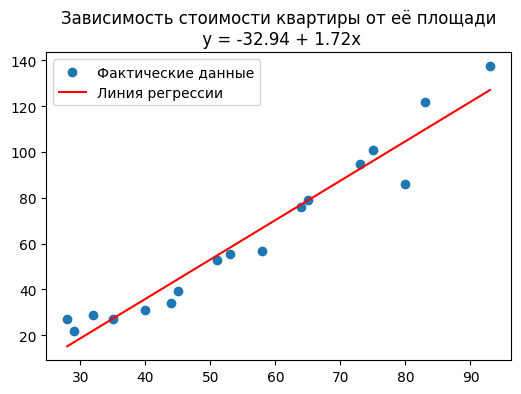

In [427]:
a , b = model.params
plt.figure(figsize=(6,4))
plt.scatter(df["x"], df["y"], label="–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ")
plt.plot(x_grid, y_hat_grid, color="red", label="–õ–∏–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏")
plt.title(f"–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç –µ—ë –ø–ª–æ—â–∞–¥–∏\n y = {a:.2f} + {b:.2f}x")
plt.legend()
plt.show()

In [428]:
r_xy = np.corrcoef(df["x"], df["y"])[0, 1]
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ü–∏—Ä—Å–æ–Ω–∞: {r_xy:.4f}")
print(f"–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏: {pow(r_xy, 2):.4f}")

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –ü–∏—Ä—Å–æ–Ω–∞: 0.9732
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏: 0.9472


In [429]:
df["e"] = df["y"] - df["y^"]
df["|e|"] = df["e"].abs()
df

x      y          y^          e        |e|
0   28   27.0   15.222451  11.777549  11.777549
1   29   22.0   16.942617   5.057383   5.057383
2   32   29.0   22.103115   6.896885   6.896885
3   35   27.0   27.263613  -0.263613   0.263613
4   40   31.0   35.864442  -4.864442   4.864442
5   44   34.0   42.745106  -8.745106   8.745106
6   45   39.3   44.465272  -5.165272   5.165272
7   51   52.7   54.786268  -2.086268   2.086268
8   53   55.4   58.226600  -2.826600   2.826600
9   58   57.0   66.827430  -9.827430   9.827430
10  64   76.0   77.148426  -1.148426   1.148426
11  65   79.1   78.868592   0.231408   0.231408
12  73   94.8   92.629919   2.170081   2.170081
13  75  101.0   96.070251   4.929749   4.929749
14  80   86.0  104.671081 -18.671081  18.671081
15  83  122.0  109.831579  12.168421  12.168421
16  93  137.4  127.033239  10.366761  10.366761

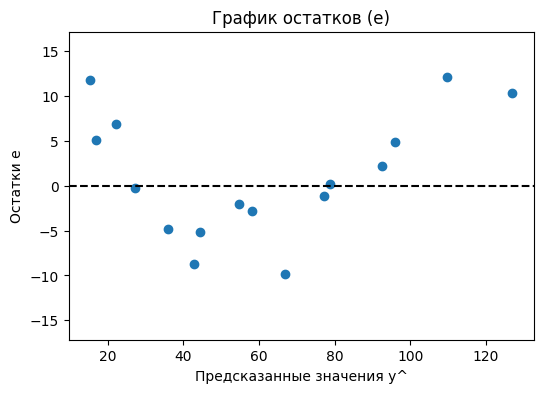

In [430]:
limit = abs(max(df["e"].min(), df["e"].max())) + 5

plt.figure(figsize=(6,4))
plt.scatter(df["y^"], df["e"])
plt.axhline(0, color="black", linestyle="--")
plt.title("–ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ (e)")
plt.xlabel("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è y^")
plt.ylabel("–û—Å—Ç–∞—Ç–∫–∏ e")
plt.ylim(- limit, limit )
plt.show()


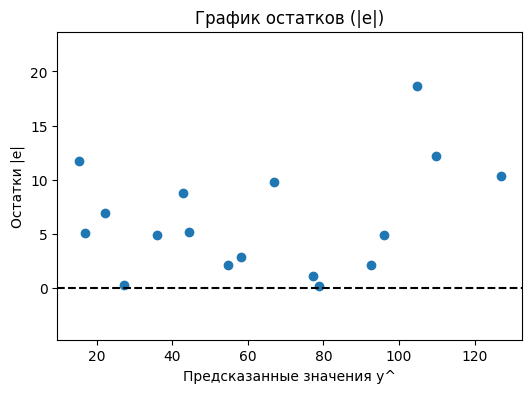

In [431]:
limit = df["|e|"].max() + 5

plt.figure(figsize=(6,4))
plt.scatter(df["y^"], df["|e|"])
plt.axhline(0, color="black", linestyle="--")
plt.title("–ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ (|e|)")
plt.xlabel("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è y^")
plt.ylabel("–û—Å—Ç–∞—Ç–∫–∏ |e|")
plt.ylim(df["|e|"].min() - 5, limit )
plt.show()


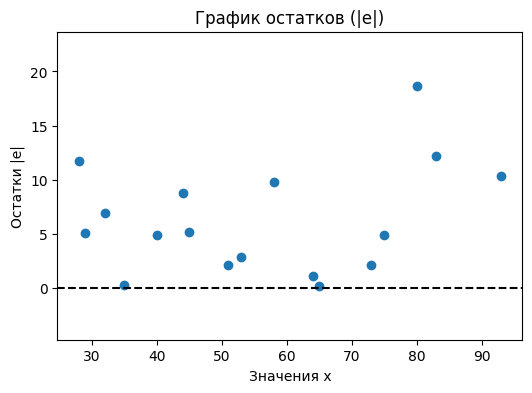

In [432]:
limit = df["|e|"].max() + 5

plt.figure(figsize=(6,4))
plt.scatter(df["x"], df["|e|"])
plt.axhline(0, color="black", linestyle="--")
plt.title("–ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ (|e|)")
plt.xlabel("–ó–Ω–∞—á–µ–Ω–∏—è x")
plt.ylabel("–û—Å—Ç–∞—Ç–∫–∏ |e|")
plt.ylim(df["|e|"].min() - 5, limit )
plt.show()


# üìò –°–º—ã—Å–ª –∫—Ä–∏—Ç–µ—Ä–∏—è –î–∞—Ä–±–∏–Ω–∞‚Äì–£–æ—Ç—Å–æ–Ω–∞
–û–Ω –ø—Ä–æ–≤–µ—Ä—è–µ—Ç –Ω–∞–ª–∏—á–∏–µ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ (–æ–±—ã—á–Ω–æ ‚Äî –ø–µ—Ä–≤–æ–π —Å—Ç–µ–ø–µ–Ω–∏, —Ç–æ –µ—Å—Ç—å —Å–≤—è–∑–∏ –º–µ–∂–¥—É e‚Çú –∏ e‚Çú‚Çã‚ÇÅ).

<img src="/Users/artemsaman/Documents/–≠–∫–æ–Ω–æ–º–µ—Ç—Ä–∏–∫–∞/Python_econometrics/22_10_2025/DW.png" width="650">

| DW –∑–Ω–∞—á–µ–Ω–∏–µ | –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è                                             |
|--------------|----------------------------------------------------------|
| **‚âà 2.0**    | –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –Ω–µ—Ç ‚úÖ                                    |
| **< 2.0**    | –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (–æ—Å—Ç–∞—Ç–∫–∏ –ø–æ—Ö–æ–∂–∏ –ø–æ –∑–Ω–∞–∫—É) ‚ö†Ô∏è |
| **> 2.0**    | –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è (–æ—Å—Ç–∞—Ç–∫–∏ —á–µ—Ä–µ–¥—É—é—Ç—Å—è) ‚ö†Ô∏è      |
| **‚âà 0**      | —Å–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è ‚ùå                   |
| **‚âà 4**      | —Å–∏–ª—å–Ω–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è ‚ùå                   |


In [433]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(model.resid)
print(f"Durbin‚ÄìWatson = {dw:.4f}")


Durbin‚ÄìWatson = 1.6705


In [434]:
import numpy as np

e = model.resid                     # –æ—Å—Ç–∞—Ç–∫–∏ –º–æ–¥–µ–ª–∏
dw = np.sum(np.diff(e)**2) / np.sum(e**2)
print(f"Durbin‚ÄìWatson = {dw:.4f}")

Durbin‚ÄìWatson = 1.6705


–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –î–∞—Ä–±–∏–Ω–∞‚Äì–£–æ—Ç—Å–æ–Ω–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç DW = 1.67, 

—á—Ç–æ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ –¥–æ–ø—É—Å—Ç–∏–º–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ (1.5‚Äì2.5).

–°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ, —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è, 

–∏ –ø—Ä–µ–¥–ø–æ—Å—ã–ª–∫–∞ –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–π –º–æ–¥–µ–ª–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –æ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—à–∏–±–æ–∫ –≤—ã–ø–æ–ª–Ω—è–µ—Ç—Å—è.

–ú–æ–¥–µ–ª—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã (y) –æ—Ç –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã 

(x) –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–π –ø–æ –¥–∞–Ω–Ω–æ–º—É –∫—Ä–∏—Ç–µ—Ä–∏—é.